In [200]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [201]:
img_array = cv2.imread("Training/0/Training_10118481.jpg")

In [202]:
img_array.shape #rgb of the image

(48, 48, 3)

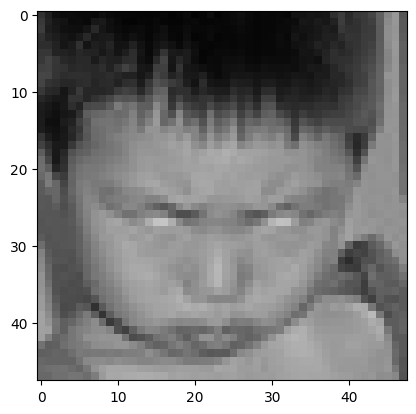

In [203]:
plt.imshow(img_array)

In [204]:
Datadirectory = "Training/" 

In [205]:
Classes = ["0", "1", "2", "3", "4"]

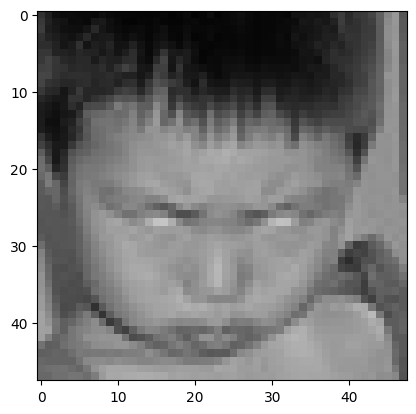

In [206]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break


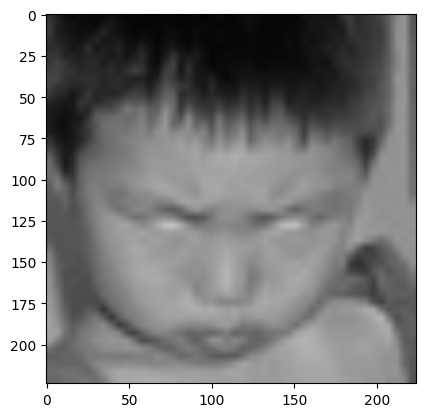

In [207]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [208]:
new_array.shape # now the shape (rgb) is 224 as we want to use transfer learning
# in order to use any deep learning classifer uses 224x224 

(224, 224, 3)

In [209]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e: 
                pass

In [210]:
training_Data = []  # Empty the list
create_training_Data()  # Load fresh data
print(f"Total images loaded: {len(training_Data)}")


Total images loaded: 17838


In [211]:
import random 
random.shuffle(training_Data)

In [212]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [213]:
X.shape

(17838, 224, 224, 3)

In [214]:
def normalize_in_batches (X, batch_size=1000):
    num_samples = X.shape[0]
    for i in range(0, num_samples, batch_size):
        end_idx = min(i + batch_size, num_samples)
        X[i:end_idx] = X[i:end_idx] / 255.0
    return X


In [215]:
X = normalize_in_batches(X, batch_size=1000)

In [216]:
Y = np.array(y)

In [217]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 

In [218]:
model = tf.keras.applications.MobileNetV2()

Transfer Learning

In [219]:
base_input = model.layers[1].input

In [220]:
base_input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_646>

In [221]:
base_output = model.layers[-2].output

In [222]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_800>

In [223]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) ## classification layer

In [224]:
final_output

<KerasTensor shape=(None, 7), dtype=float32, sparse=False, ragged=False, name=keras_tensor_806>

In [225]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [226]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics= ["accuracy"]) 

In [ ]:
new_model.fit(X, Y, epochs=25)

Epoch 1/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 1488s 3s/step - accuracy: 0.2506 - loss: 1.6004
Epoch 2/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 1428s 3s/step - accuracy: 0.2499 - loss: 1.5837
Epoch 3/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 1413s 3s/step - accuracy: 0.2575 - loss: 1.5795
Epoch 4/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 1347s 2s/step - accuracy: 0.2568 - loss: 1.5795
Epoch 5/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 1348s 2s/step - accuracy: 0.2560 - loss: 1.5776
Epoch 6/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 1345s 2s/step - accuracy: 0.2564 - loss: 1.5771
Epoch 7/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 1414s 3s/step - accuracy: 0.2556 - loss: 1.5745
Epoch 8/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 1430s 3s/step - accuracy: 0.2514 - loss: 1.5806
Epoch 9/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 1428s 3s/step - accuracy: 0.2547 - loss: 1.5775
Epoch 10/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 1437s 3s/step - accuracy: 0.2583 - loss: 1.5731
Epoch 11/25
558/558 ━━━━━━━━━━━━━━━━━━━━ 1642s 3s/step - accuracy: 0.2510 - loss: 1.5761
Epoch 12/25
558/558 ━━━━━━━━━━